**HỆ THỐNG GỢI Ý (RECOMMENDER SYSTEMS)**

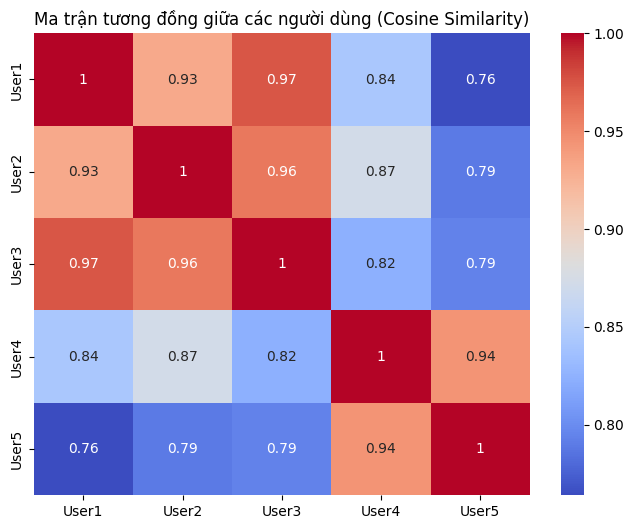

Gợi ý sản phẩm cho User1:
Đánh giá hiệu suất (Precision, Recall, F1-score):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.75      0.50      0.33         4
weighted avg       0.75      0.50      0.33         4



In [11]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Tạo một DataFrame giả lập cho hệ thống gợi ý (user-item interactions)
data = {
    'User': ['User1', 'User2', 'User3', 'User4', 'User5'],
    'Item1': [5, 3, 4, 4, 2],
    'Item2': [3, 4, 4, 2, 1],
    'Item3': [4, 3, 5, 4, 5],
    'Item4': [1, 2, 1, 5, 4],
}

df = pd.DataFrame(data)
df.set_index('User', inplace=True)

# Xây dựng mô hình Nearest Neighbors
model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=3)
model.fit(df.values)  # Sử dụng các người dùng làm đặc trưng (columns)

# Hàm gợi ý sản phẩm cho người dùng
def recommend_products(user_id, df, model):
    user_index = df.index.get_loc(user_id)  # Lấy chỉ mục người dùng trong DataFrame
    distances, indices = model.kneighbors([df.iloc[user_index].values])  # Tìm những người dùng tương tự

    # Lấy danh sách các sản phẩm người dùng đã tương tác
    user_ratings = df.iloc[user_index].values
    recommended_items = []

    # Duyệt qua những người dùng tương tự để tìm sản phẩm chưa được người dùng tương tác
    for i in range(1, len(indices[0])):
        similar_user = df.index[indices[0][i]]
        similar_user_ratings = df.iloc[indices[0][i]].values
        for j, rating in enumerate(similar_user_ratings):
            if user_ratings[j] == 0 and rating > 3:  # Nếu người dùng chưa thử và sản phẩm có điểm số cao
                recommended_items.append(df.columns[j])

    return set(recommended_items)  # Trả về danh sách các sản phẩm gợi ý

# Gợi ý sản phẩm cho User1
user = 'User1'
recommended_items = recommend_products(user, df, model)
# Tính ma trận tương đồng cosine giữa các người dùng
cosine_sim = cosine_similarity(df.values)

# Trực quan hóa bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim, annot=True, cmap="coolwarm", xticklabels=df.index, yticklabels=df.index)
plt.title("Ma trận tương đồng giữa các người dùng (Cosine Similarity)")
plt.show()

# Tính các chỉ số đánh giá (Precision, Recall, F1-score)
y_true = np.array([1 if df.loc[user, item] > 3 else 0 for item in df.columns])  # Sản phẩm người dùng đã tương tác
y_pred = np.array([1 if item in recommended_items else 0 for item in df.columns])  # Sản phẩm gợi ý


print(f"Gợi ý sản phẩm cho {user}:")
for item in recommended_items:
    print(item)

# In kết quả đánh giá hiệu suất
print("Đánh giá hiệu suất (Precision, Recall, F1-score):")
print(classification_report(y_true, y_pred, zero_division=1))

**PHÁT HIỆN BẤT THƯỜNG (ANOMALY DETECTION)**

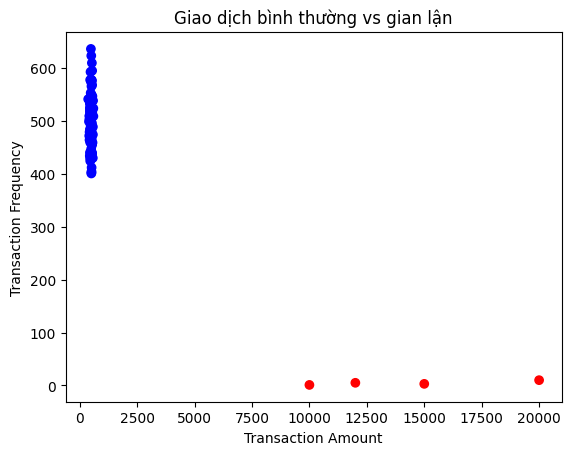

So sánh kết quả giữa Isolation Forest và DBSCAN:
    Label Predicted DBSCAN_Predicted
0  Normal    Normal           Normal
1  Normal    Normal           Normal
2  Normal    Normal           Normal
3  Normal    Normal           Normal
4  Normal    Normal           Normal
5  Normal    Normal           Normal
6  Normal    Normal           Normal
7  Normal    Normal           Normal
8  Normal    Normal           Normal
9  Normal    Normal           Normal
Isolation Forest:
              precision    recall  f1-score   support

  Fraudulent       0.80      1.00      0.89         4
      Normal       1.00      0.99      0.99       100

    accuracy                           0.99       104
   macro avg       0.90      0.99      0.94       104
weighted avg       0.99      0.99      0.99       104

DBSCAN:
              precision    recall  f1-score   support

  Fraudulent       1.00      1.00      1.00         4
      Normal       1.00      1.00      1.00       100

    accuracy               

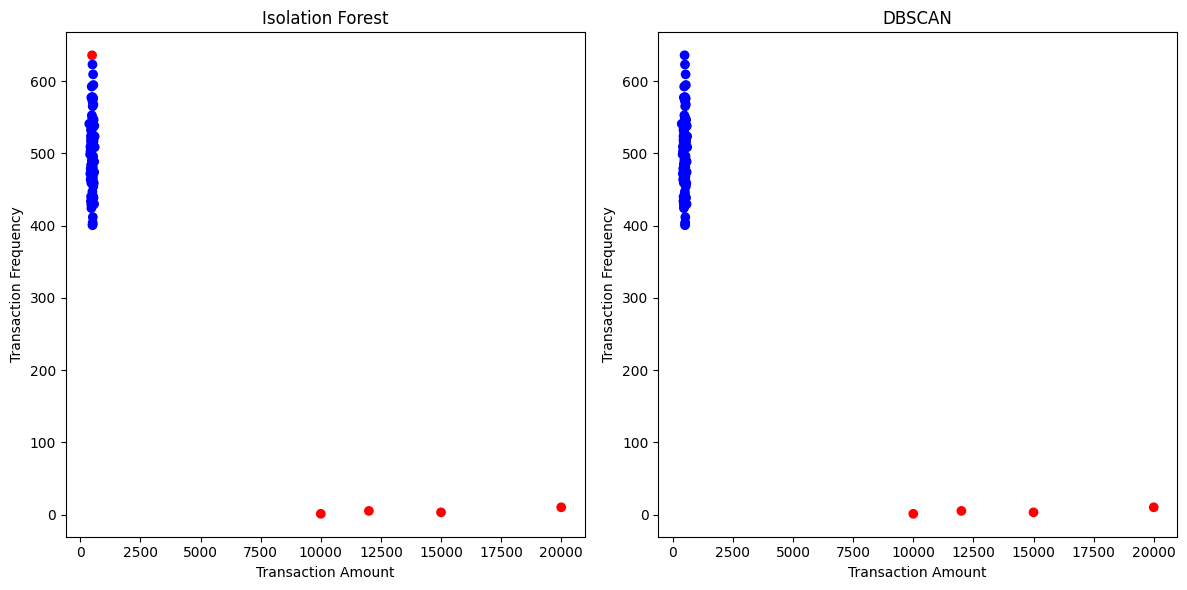

In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report

# Tạo dữ liệu giả lập về giao dịch (Số tiền giao dịch và tần suất giao dịch)
np.random.seed(42)

# Dữ liệu bình thường (giao dịch hợp lệ)
normal_transactions = np.random.normal(loc=500, scale=50, size=(100, 2))

# Dữ liệu bất thường (giao dịch gian lận với số tiền rất lớn)
fraudulent_transactions = np.array([[10000, 1], [15000, 3], [12000, 5], [20000, 10]])

# Kết hợp dữ liệu bình thường và bất thường
X = np.vstack([normal_transactions, fraudulent_transactions])

# Tạo DataFrame để dễ dàng theo dõi
df = pd.DataFrame(X, columns=['Transaction Amount', 'Transaction Frequency'])
df['Label'] = ['Normal'] * 100 + ['Fraudulent'] * 4  # Gắn nhãn cho dữ liệu

# Vẽ biểu đồ giao dịch
plt.scatter(df['Transaction Amount'], df['Transaction Frequency'], color=['blue' if label == 'Normal' else 'red' for label in df['Label']])
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Frequency')
plt.title('Giao dịch bình thường vs gian lận')
plt.show()

# Khởi tạo và huấn luyện mô hình Isolation Forest
model = IsolationForest(contamination=0.04)  # Dự đoán 4% dữ liệu là bất thường (giao dịch gian lận)
model.fit(X)

# Dự đoán bất thường
pred = model.predict(X)
df['Predicted'] = ['Fraudulent' if p == -1 else 'Normal' for p in pred]

# Áp dụng DBSCAN để phát hiện gian lận
dbscan_model = DBSCAN(eps=200, min_samples=5).fit(X)
df['DBSCAN_Predicted'] = ['Fraudulent' if label == -1 else 'Normal' for label in dbscan_model.labels_]

# So sánh kết quả bằng bảng
comparison = df[['Label', 'Predicted', 'DBSCAN_Predicted']]
print("So sánh kết quả giữa Isolation Forest và DBSCAN:")
print(comparison.head(10))

# Đánh giá hiệu quả mô hình
print("Isolation Forest:")
print(classification_report(df['Label'], df['Predicted']))

print("DBSCAN:")
print(classification_report(df['Label'], df['DBSCAN_Predicted']))

# Biểu đồ so sánh trực quan
plt.figure(figsize=(12, 6))

# Biểu đồ Isolation Forest
plt.subplot(1, 2, 1)
plt.scatter(df['Transaction Amount'], df['Transaction Frequency'], c=['blue' if label == 'Normal' else 'red' for label in df['Predicted']])
plt.title("Isolation Forest")
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Frequency")

# Biểu đồ DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(df['Transaction Amount'], df['Transaction Frequency'], c=['blue' if label == 'Normal' else 'red' for label in df['DBSCAN_Predicted']])
plt.title("DBSCAN")
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Frequency")

plt.tight_layout()
plt.show()
